In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain

from preprocess_tensho_db import load_img_binaries
from preprocess_tensho_db import optimize_otsu_threshold, compute_standard_deviations, best_threshold_maximize_difference_of_std, compute_standard_deviations_2


In [2]:

xlim = (0, 255)

def pixel_value_histgram(im: np.ndarray, ax=None):
    return pd.DataFrame(im.reshape(-1, 1), columns=["image"]).plot.hist(xlim=xlim, bins=100, ax=ax)


def otsu_criteria_plot(criterias, ax=None):
    return pd.DataFrame(criterias, columns=["otsu_criteria"]).plot(xlim=xlim, ax=ax, secondary_y=["otsu_criteria"])


100%|██████████| 256/256 [00:07<00:00, 33.48it/s]


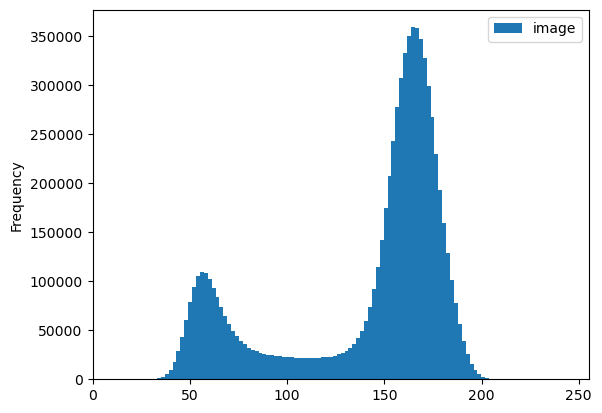

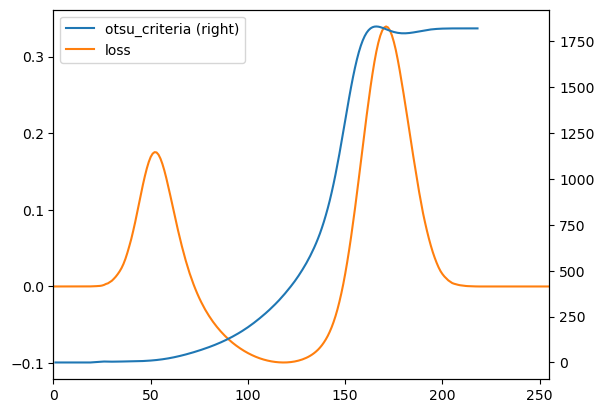

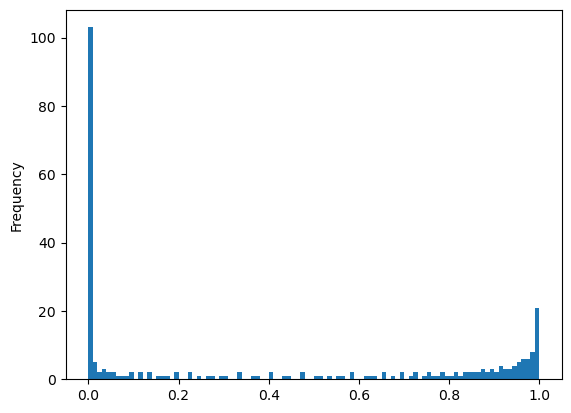

100%|██████████| 256/256 [00:11<00:00, 22.50it/s]


otsu threshold: 0, our threshold: 118


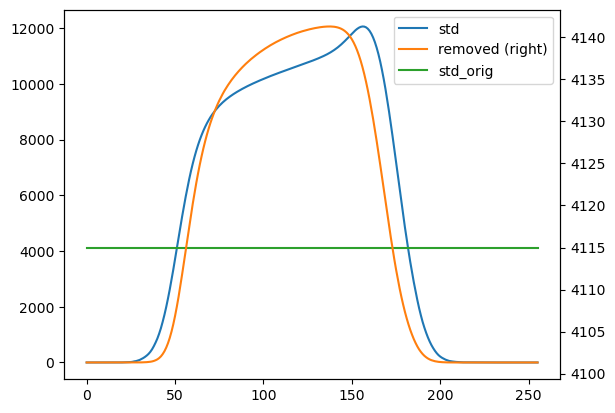

In [3]:
te_id = "TE00007"
test_dir = f"/Users/life_mac_43/Projects/MediaDesign/MMD-Variational-Autoencoder-Pytorch-InfoVAE/data/tensho/{te_id}/characters/"
batch = load_img_binaries(test_dir)
batch_np = np.array([*chain.from_iterable(batch)])
th_otsu, crits = optimize_otsu_threshold(batch_np)
data = compute_standard_deviations(batch)
th, df = best_threshold_maximize_difference_of_std(data)
pixel_value_histgram(batch_np)
ax = otsu_criteria_plot(crits)
df.plot(y=["loss"], ax=ax)
plt.show()
df["removed"].plot.hist(bins=100)
plt.show()
data2 = compute_standard_deviations_2(batch)
pd.DataFrame(data2, columns=["std", "removed", "std_orig"]).plot(secondary_y=["removed"])
print(f"otsu threshold: {th_otsu}, our threshold: {th}")
# test_tensho(make_dataset(te_id, th_otsu))
# test_tensho(make_dataset(te_id, th))

<AxesSubplot:>

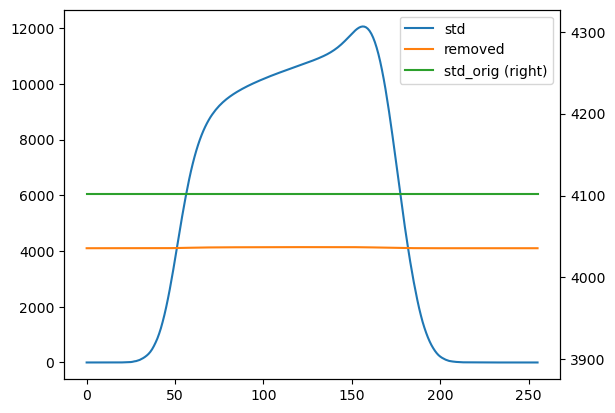

In [4]:
pd.DataFrame(data2, columns=["std", "removed", "std_orig"]).plot(secondary_y=["std_orig"])